In [7]:
using GIANT

using LinearAlgebra
using MAT


In [8]:
r = 49
datafile = "../data/cbclim.mat"
datavarname = "M" # name of the variable of the file corresponding to input matrix
nbpixelsrow = 19
nbpixelscol = 19
nbimgperrow = 7
bw=false

# Algorithms parameters
k = 3
matk = k*361;


In [4]:
# Read data and dictionnary
data = matopen(datafile);
M = Array(read(data, datavarname));

In [5]:
# Compute H with SNPA
J = snpa(copy(M'), r);
H = M[J,:];



Run Homotopy no sparse (k=r)


0.14540234230733226

 10.134698 seconds (12.16 M allocations: 791.149 MiB, 5.33% gc time)


"Sparsity 6.7645429362880884"

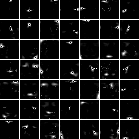

In [6]:
println("\nRun Homotopy no sparse (k=r)")
@time hnosW = homotopymatrix(M', H', r, assignksparse)
display(norm(M - hnosW' * H) / norm(M))
display("Sparsity $(colsparsity(hnosW))")
displayabundancemap(hnosW, nbpixelsrow, nbpixelscol, "out-cbcl-hnos.png", bw=bw, nbimgperrow=nbimgperrow, notebook=true)